In [34]:
import pickle 

# Data wrangling
import numpy as np
import pandas as pd

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.regressor import residuals_plot, prediction_error

# Pipelines para tratar dados futuros
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Seleção e Validação de modelos
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

# Pré-processamento para incluir no pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Modelos
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Manter saída do processamento do sklearn como DataFrame pandas
from sklearn import set_config
set_config(transform_output="pandas")

In [2]:
def get_metrics(y_true, y_pred):
    dict_metrics = {
        'R2' : metrics.r2_score(y_true, y_pred),
        'MAE' : metrics.mean_absolute_error(y_true, y_pred),
        'MAPE' : metrics.mean_absolute_percentage_error(y_true, y_pred),
        'RMSE' : np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    }
    return dict_metrics

In [3]:
# df = pd.read_csv('../data/insurance.csv')

URL_DATA = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(URL_DATA)
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='age', ylabel='charges'>

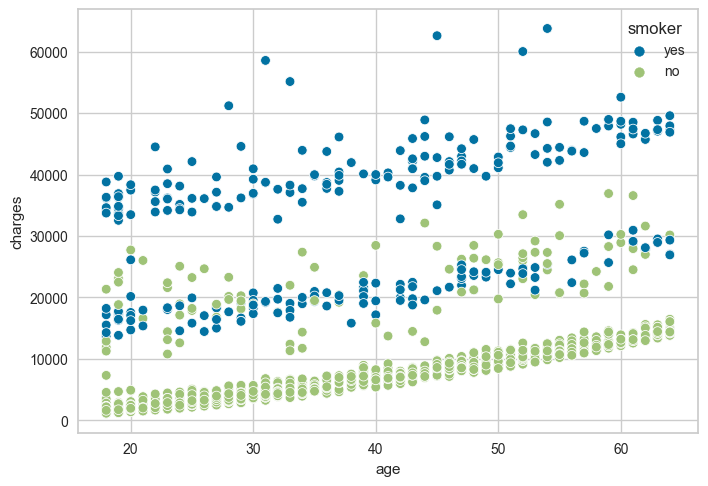

In [6]:
sns.scatterplot(x='age', y='charges', data=df, hue = 'smoker')

<Axes: xlabel='bmi', ylabel='charges'>

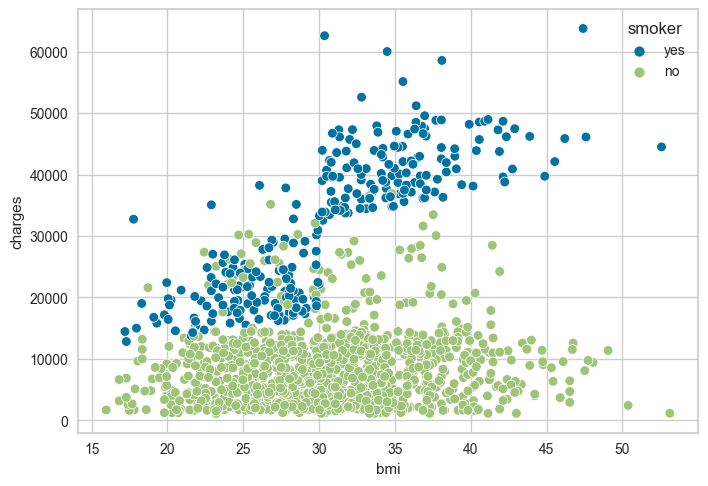

In [7]:
sns.scatterplot(x='bmi', y='charges', data=df, hue = 'smoker')

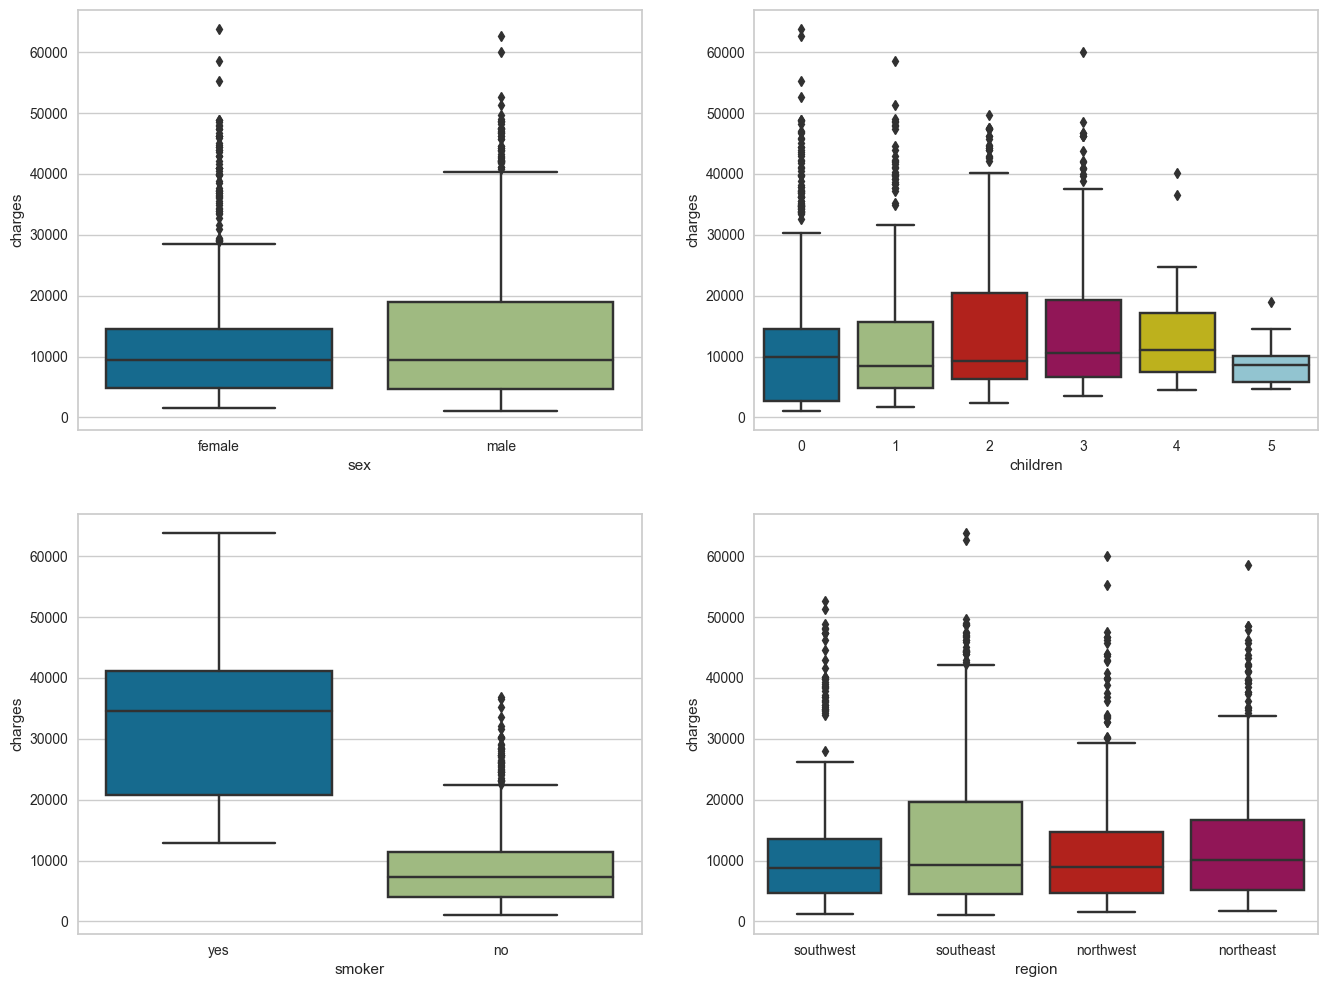

In [8]:
cat_plot_cols = ['sex', 'children', 'smoker', 'region']

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
for col, ax in zip(cat_plot_cols, axes.flatten()):
    sns.boxplot(x=col, y='charges', data=df, ax=ax)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_4700\686972001.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfc = df.corr()


<Axes: >

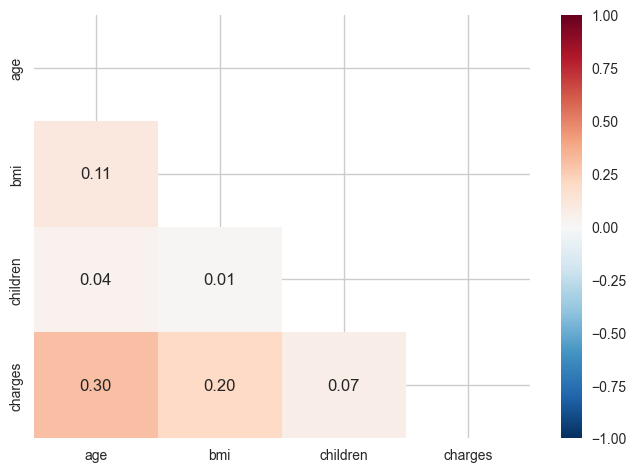

In [9]:
dfc = df.corr()
mask = np.zeros(dfc.shape).astype(bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(dfc, annot=True, fmt='.2f', center=0, vmax=1, vmin=-1, cmap='RdBu_r', mask=mask)

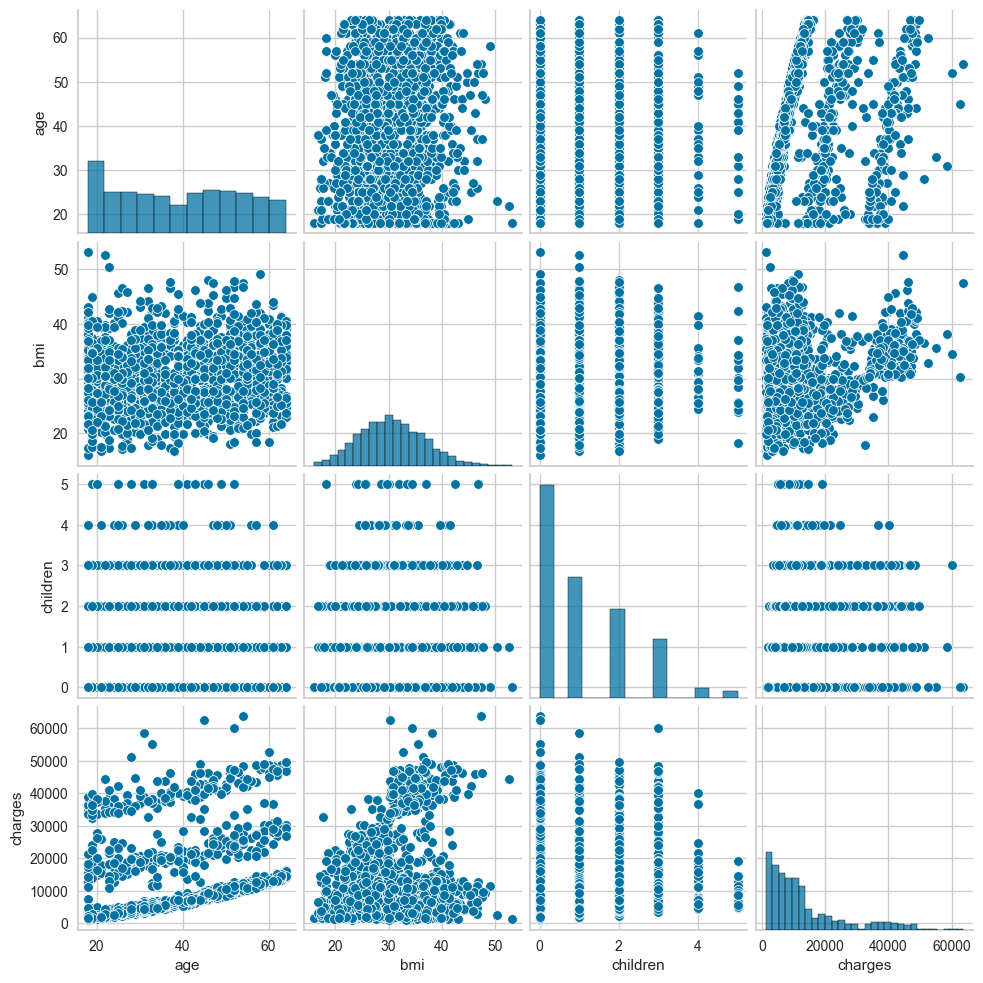

In [10]:
sns.pairplot(df)

# Modeling

In [11]:
NUMERICAL_FEATURES = ['age', 'bmi', 'children']
CATEGORICAL_FEATURES = ['sex','smoker','region']

FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
TARGET = 'charges'

In [12]:
X = df[FEATURES]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2025)

In [13]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    OneHotEncoder(drop='if_binary', 
    handle_unknown='ignore', 
    sparse_output=False
    )
)

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, NUMERICAL_FEATURES),
    ('cat', categorical_transformer, CATEGORICAL_FEATURES)
])

preprocessor.fit_transform(X_train)

,num__age,num__bmi,num__children,cat__sex_male,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
404,0.282609,0.098720,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1130,0.456522,0.194272,1.0,0.0,0.0,0.0,0.0,1.0,0.0
461,0.521739,0.363073,0.0,1.0,1.0,0.0,0.0,0.0,1.0
731,0.760870,0.126256,0.2,1.0,0.0,0.0,0.0,0.0,1.0
511,0.195652,0.463858,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
160,0.521739,0.269448,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1235,0.173913,0.392400,0.0,1.0,0.0,0.0,1.0,0.0,0.0
323,0.847826,0.664464,0.0,1.0,0.0,1.0,0.0,0.0,0.0
862,0.804348,0.460416,0.4,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DummyRegressor())
])

In [15]:
params = {
    'model': [
        DummyRegressor(),
        LinearRegression(),
        LassoCV(),
        RidgeCV(),
        RandomForestRegressor(random_state=2025),
        GradientBoostingRegressor(random_state=2025)
    ]
}

grid_model = GridSearchCV(model_pipeline, params, cv=5, scoring='r2', verbose=1)
grid_model.fit(X_train, y_train);

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [16]:
grid_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', GradientBoostingRegressor(random_state=2025))])

In [17]:
df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()
df_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,
1,0.090200,0.001941,0.006600,0.000490,GradientBoostingRegressor(random_state=2025),{'model': GradientBoostingRegressor(random_sta...,0.852329,0.825235,0.861952,0.872451,0.822419,0.846877,0.019888
2,0.253000,0.003578,0.012402,0.000800,RandomForestRegressor(random_state=2025),{'model': RandomForestRegressor(random_state=2...,0.852849,0.805483,0.846759,0.844485,0.799011,0.829718,0.022688
3,0.012199,0.001166,0.006201,0.000400,RidgeCV(),{'model': RidgeCV()},0.757731,0.702384,0.749778,0.788840,0.738203,0.747387,0.028074
4,0.044001,0.002098,0.006799,0.000400,LassoCV(),{'model': LassoCV()},0.756119,0.702804,0.750476,0.788701,0.736380,0.746896,0.027929
5,0.013999,0.003521,0.006000,0.000002,LinearRegression(),{'model': LinearRegression()},0.756243,0.702325,0.749746,0.788008,0.736728,0.746610,0.027840
6,0.014400,0.003612,0.006799,0.001327,DummyRegressor(),{'model': DummyRegressor()},-0.015587,-0.003836,-0.002604,-0.004128,-0.004566,-0.006144,0.004766


# Modelo com Hiperparam

In [18]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=2025))
])

params = {
    'model__learning_rate': [0.1, 0.01],
    'model__max_depth': [3, 4, 5],
    'model__n_estimators': [300, 400, 500],
    'model__subsample': [1.0, 0.8]
}

grid_model = GridSearchCV(model_pipeline, params, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_model.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [19]:
df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()
df_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,
1,0.669201,0.032295,0.0148,0.002713,0.01,3,500,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.863206,0.832688,0.874333,0.877687,0.824352,0.854453,0.021870
2,0.534200,0.026694,0.0128,0.000748,0.01,3,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.863868,0.832199,0.875056,0.877133,0.823384,0.854328,0.022307
3,0.651600,0.035057,0.0132,0.001166,0.01,3,500,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.860923,0.831442,0.873117,0.875649,0.823304,0.852887,0.021573
4,0.552600,0.039977,0.0132,0.001721,0.01,3,400,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.861953,0.831672,0.873904,0.874658,0.821291,0.852696,0.022118
5,0.459200,0.062962,0.0124,0.000800,0.01,3,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.863198,0.831079,0.872845,0.874965,0.818672,0.852152,0.022959


In [20]:
model_pipeline = grid_model.best_estimator_

In [21]:
y_pred = model_pipeline.predict(X_test)
get_metrics(y_test,y_pred)

{'R2': 0.8709437137953778,
 'MAE': 2480.21603911931,
 'MAPE': 0.29485260583554557,
 'RMSE': 4337.044722636448}

<Axes: xlabel='charges'>

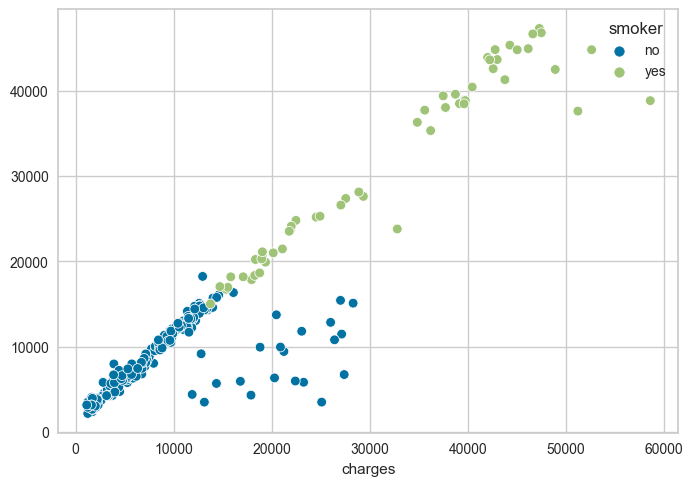

In [22]:
sns.scatterplot(x=y_test, y=y_pred, hue=X_test.smoker)

<Axes: >

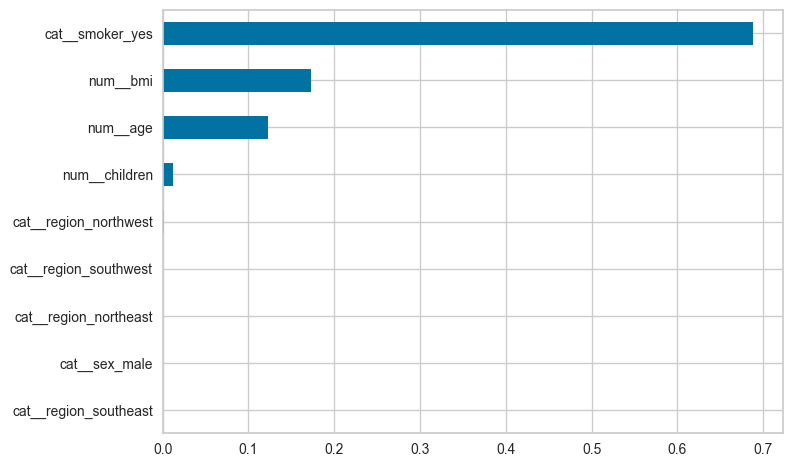

In [27]:
importances = pd.Series(
model_pipeline.named_steps['model'].feature_importances_,
model_pipeline.named_steps['preprocessor'].get_feature_names_out()
)
importances.sort_values().plot.barh()

# Modelo Pipeline com Variáveis Relevantes apenas

In [28]:
NUMERICAL_FEATURES = ['age', 'bmi', 'children']
CATEGORICAL_FEATURES = ['smoker']

FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
TARGET = 'charges'

X = df[FEATURES]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2025)

In [29]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    OneHotEncoder(drop='if_binary', 
    handle_unknown='ignore', 
    sparse_output=False
    )
)

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, NUMERICAL_FEATURES),
    ('cat', categorical_transformer, CATEGORICAL_FEATURES)
])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=2025))
])


params = {
    'model__learning_rate': [0.1, 0.01],
    'model__max_depth': [3, 4, 5],
    'model__n_estimators': [300, 400, 500],
    'model__subsample': [1.0, 0.8]
}

grid_model = GridSearchCV(model_pipeline, params, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_model.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [30]:
df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()
df_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,
1,0.549400,0.059200,0.013800,0.002040,0.01,3,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.863341,0.833403,0.876937,0.875657,0.822601,0.854388,0.022324
2,0.671400,0.075997,0.014600,0.001855,0.01,3,500,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.862132,0.833364,0.876613,0.874904,0.823355,0.854074,0.021814
3,0.478401,0.028570,0.012000,0.002098,0.01,3,400,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.862223,0.832887,0.875156,0.872843,0.820536,0.852729,0.022035
4,0.589600,0.075375,0.014798,0.005980,0.01,3,500,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.861447,0.832923,0.873712,0.872644,0.822495,0.852644,0.021068
5,0.433000,0.057114,0.013801,0.001939,0.01,3,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.863173,0.832394,0.874194,0.874649,0.818400,0.852562,0.022988


In [31]:
model_pipeline = grid_model.best_estimator_

y_pred = model_pipeline.predict(X_test)
get_metrics(y_test,y_pred)

{'R2': 0.8697155691754795,
 'MAE': 2522.059090742129,
 'MAPE': 0.31226298830653787,
 'RMSE': 4357.632273960676}

<Axes: xlabel='charges'>

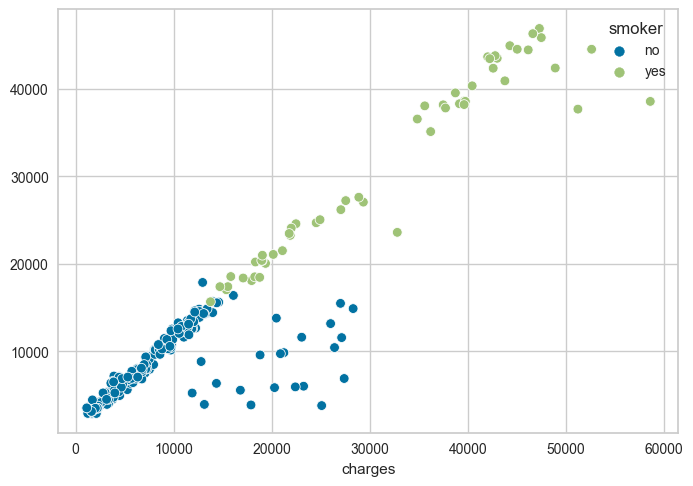

In [32]:
sns.scatterplot(x=y_test, y=y_pred, hue=X_test.smoker)

<Axes: >

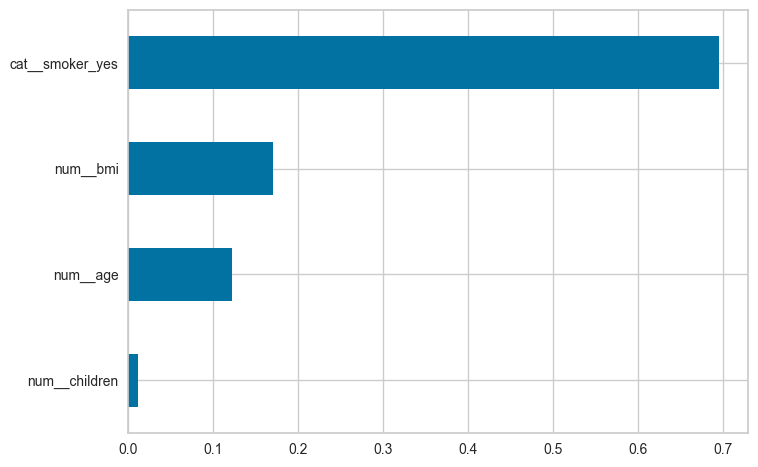

In [33]:
importances = pd.Series(
model_pipeline.named_steps['model'].feature_importances_,
model_pipeline.named_steps['preprocessor'].get_feature_names_out()
)
importances.sort_values().plot.barh()

In [36]:
with open('../models/model.pkl', 'wb') as file_model: # ou joblib
    pickle.dump(model_pipeline, file_model)